# 01 - Data Preprocessing

In [1]:
from metaboDGD.src import decoder
import torch

In [2]:
dgd = decoder.Decoder(latent_layer_dim=20, output_layer_dim=2000, hidden_layer_dim=[100,200,300])

## A - Libraries

In [1]:
from metaboDGD.util import data

## B - Retrieving Separate Datasets

In [2]:
df, cohorts = data.combine_cohort_datasets()

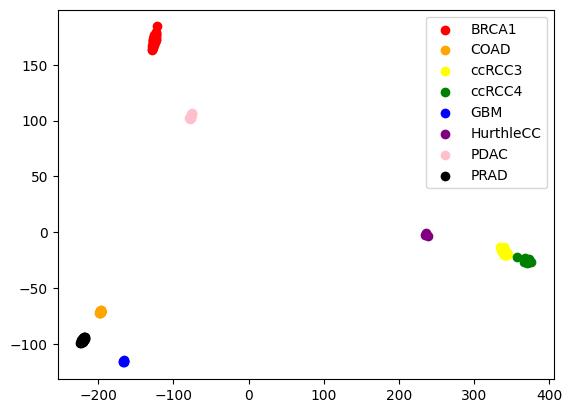

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
np_df = df.T.to_numpy()
pca_model = PCA(n_components=2)
results = pca_model.fit_transform(np_df)

plt.scatter(results[0:47,0], results[0:47, 1], c='red'          ,label="BRCA1")
plt.scatter(results[47:86,0], results[47:86, 1], c='orange'     ,label="COAD")
plt.scatter(results[86:133,0], results[86:133, 1], c='yellow'   ,label="ccRCC3")
plt.scatter(results[133:157,0], results[133:157, 1], c='green'  ,label="ccRCC4")
plt.scatter(results[157:163,0], results[157:163, 1], c='blue'   ,label="GBM")
plt.scatter(results[163:166,0], results[163:166, 1], c='purple' ,label="HurthleCC")
plt.scatter(results[166:178,0], results[166:178, 1], c='pink'   ,label="PDAC")
plt.scatter(results[178:224,0], results[178:224, 1], c='black'  ,label="PRAD")
plt.legend()
plt.show()

In [15]:
np_df.shape

(224, 1915)

In [5]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=8)
gmm = gmm.fit(np_df)

c:\AnacondaDestination\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
results = gmm.sample(n_samples=1000)

In [41]:
import pandas as pd
pd.Series(results[1]).value_counts()

1    224
2    202
7    183
0    176
3    118
5     53
4     27
6     17
Name: count, dtype: int64

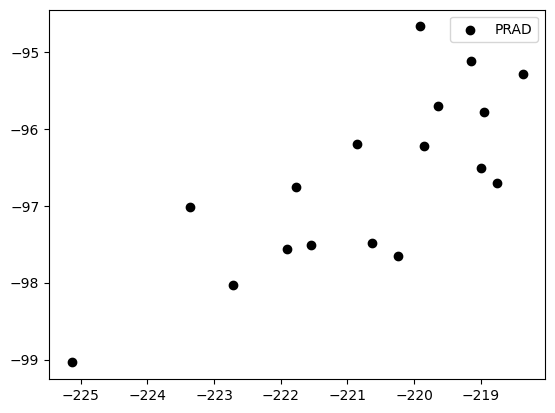

In [51]:
pca_new = PCA(n_components=2)
results_new = pca_model.transform(results[0])
# results_new = pca_model.transform(results[0])
# plt.scatter(results_new[0:224,0]   , results_new[0:224, 1], c='red'          ,label="BRCA1")
# plt.scatter(results_new[224:426,0]  , results_new[224:426, 1], c='orange'     ,label="COAD")
# plt.scatter(results_new[426:609,0] , results_new[426:609, 1], c='yellow'   ,label="ccRCC3")
# plt.scatter(results_new[609:785,0], results_new[609:785, 1], c='green'  ,label="ccRCC4")
# plt.scatter(results_new[785:903,0], results_new[785:903, 1], c='blue'   ,label="GBM")
# plt.scatter(results_new[903:956,0], results_new[903:956, 1], c='purple' ,label="HurthleCC")
# plt.scatter(results_new[956:983,0], results_new[956:983, 1], c='pink'   ,label="PDAC")
plt.scatter(results_new[983:1000,0], results_new[983:1000, 1], c='black'  ,label="PRAD")
plt.legend()
plt.show()

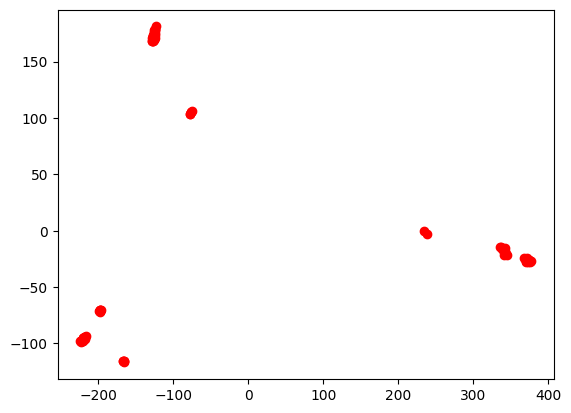

In [ ]:
# pca_new = PCA(n_components=2)
results_new = pca_model.transform(results[0])
# plt.scatter(results_new[0:47,0]   , results_new[0:47, 1], c='red'          ,label="BRCA1")
# plt.scatter(results_new[47:86,0]  , results_new[47:86, 1], c='orange'     ,label="COAD")
# plt.scatter(results_new[86:133,0] , results_new[86:133, 1], c='yellow'   ,label="ccRCC3")
# plt.scatter(results_new[133:157,0], results_new[133:157, 1], c='green'  ,label="ccRCC4")
# plt.scatter(results_new[157:163,0], results_new[157:163, 1], c='blue'   ,label="GBM")
# plt.scatter(results_new[163:166,0], results_new[163:166, 1], c='purple' ,label="HurthleCC")
# plt.scatter(results_new[166:178,0], results_new[166:178, 1], c='pink'   ,label="PDAC")
# plt.scatter(results_new[178:224,0], results_new[178:224, 1], c='black'  ,label="PRAD")
plt.legend()
plt.show()

In [33]:
# Get the xls file
cohort_name = "PRAD"
xls = pd.ExcelFile(f'data/PreprocessedData_{cohort_name}.xlsx')

# Get the dataframes for the preprocessed metabolomics data
# t = xls.parse("metabo_imputed_filtered_Tumor")
n = xls.parse("metabo_imputed_filtered_Normal")

# Replace IDs of the dataframes
# t.rename({"Unnamed: 0": "t_met"}, inplace=True, axis=1)
n.rename({"Unnamed: 0": "n_met"}, inplace=True, axis=1)

# Get list of metabolites
# t_list = t["t_met"].to_list()
n_list = n["n_met"].to_list()
# met_list = list(set(t_list) | set(n_list))

# Create a dictionary of the metabolite names and HMDB IDs
###########
# 05/25/25 - Eliminated HMDB IDs use because only 72% of the features have HMDB IDs across all cohorts
# For Reference:
#           TOTAL_FEATURES  TOTAL_FEATURES_WITH_HMDB_IDS
# BRCA1     324             215
# COAD      160	            141
# ccRCC3    727	            551
# ccRCC4    951	            701
# GBM       704	            357
# HurthleCC 668	            523
# PDAC      325	            279
# PRAD      382	            320
###########
# metanno = xls.parse("metanno")
# metanno_dict = metanno.set_index("H_name")["H_HMDB"].to_dict()
# hmdb_list = set(metanno.loc[metanno["H_name"].isin(n_list)]["H_HMDB"].tolist()


# Get dataframe with only sorted shared metabolites
# t_shared = t[t["t_met"].isin(met_list)]
# t_shared.sort_values("t_met", ignore_index=True, inplace=True)
# n_shared = n[n["n_met"].isin(met_list)]
# n_shared.sort_values("n_met", ignore_index=True, inplace=True)
# merged = pd.concat([t_shared, n_shared], axis=1)

# n = n.set_index(n["n_met"])
n_no_labels = n.drop(labels=['n_met'], axis=1)
print(n.set_index("n_met"))

                              DFCI-00530  DFCI-00532  DFCI-00536  DFCI-00540  \
n_met                                                                          
1,2-propanediol                -3.145295   -1.874510    0.022213   -2.474979   
1,3-diaminopropane             -3.136273   -3.136273   -3.136273   -1.600155   
1,5-anhydroglucitol (1,5-AG)   -0.573711    0.179714   -0.596981   -0.660364   
1,7-dimethylurate               0.804077    0.465929   -0.288257    0.852950   
1-arachidonoyl-GPC (20:4n6)    -0.921294    1.793375    0.044667    0.247106   
...                                  ...         ...         ...         ...   
leucylleucine                  -1.565186   -1.565186   -1.565186   -1.565186   
piperine                       -2.578222   -2.578222   -2.578222   -2.578222   
saccharopine                   -1.902064   -1.902064   -1.902064   -1.902064   
theobromine                    -1.693003   -1.693003   -1.693003   -1.693003   
UDP-N-acetylglucosamine        -2.076153